<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Example-1" data-toc-modified-id="Example-1-1">Example 1</a></span><ul class="toc-item"><li><span><a href="#make-synthetic-dataset" data-toc-modified-id="make-synthetic-dataset-1.1">make synthetic dataset</a></span></li><li><span><a href="#build-Hilbert-spectrum" data-toc-modified-id="build-Hilbert-spectrum-1.2">build Hilbert spectrum</a></span></li></ul></li><li><span><a href="#Example-2" data-toc-modified-id="Example-2-2">Example 2</a></span><ul class="toc-item"><li><span><a href="#make-synthetic-dataset" data-toc-modified-id="make-synthetic-dataset-2.1">make synthetic dataset</a></span></li><li><span><a href="#build-Hilbert-spectrum" data-toc-modified-id="build-Hilbert-spectrum-2.2">build Hilbert spectrum</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pyhht as hht
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

<center>
    In this notebook we show an example of <a href='https://en.wikipedia.org/wiki/Hilbert_spectral_analysis'> Hilbert spectral analysis </a>
    
</center>

# Example 1

## make synthetic dataset

Make syntetic dataset ...

In [ ]:
Fs = 32768
duration = 0.125
t = np.linspace(0, duration, duration * Fs)

# pick two different frequencies ...
f1, f2 = 697, 1336

# ...to make two sinusoidal signals...
y1 = np.sin(2 * np.pi * f1 * t);
y2 = np.sin(2 * np.pi * f2 * t);
# ...average them,...
y = (y1 + y2) / 2

# ... and add a linear trend.
y += np.linspace(0, 0.5, t.shape[0])

... and plot it

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


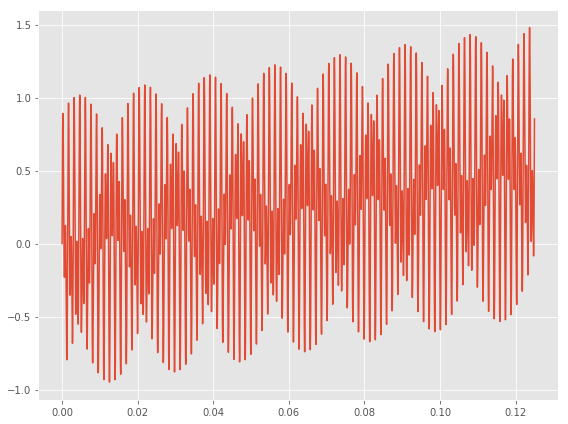

In [2]:
plt.figure(figsize=(8, 6))
plt.plot(t, y)
plt.tight_layout();

compute IMFs (intrinsic mode functions), by applying the [Hilbert–Huang transform](https://en.wikipedia.org/wiki/Hilbert–Huang_transform)...

In [6]:
# compute IMF...
emd = hht.EMD(y, nbsym=4)
imfs = emd.decompose()

# ...export in respective variables
imf1 = imfs[0, :]
imf2 = imfs[1, :]

...and plot them

2
3


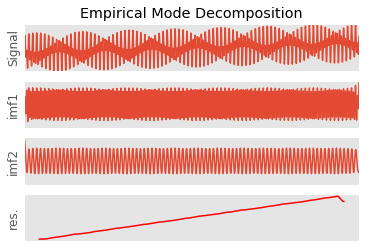

In [68]:
hht.plot_imfs(y,imfs)

run the [Hilbert transform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html) to make the IMFs analytic

In [7]:
h1 = sp.signal.hilbert(imf1)
h2 = sp.signal.hilbert(imf2)

for each IMF, extract phases, absolute values, ...

In [8]:
phase1 = sp.angle(h1)
phase2 = sp.angle(h2)
a1 = np.abs(h1)
a2 = np.abs(h2)

...unwrap phases...

In [11]:
p1 = sp.unwrap(phase1)
p2 = sp.unwrap(phase2)

...and plot them

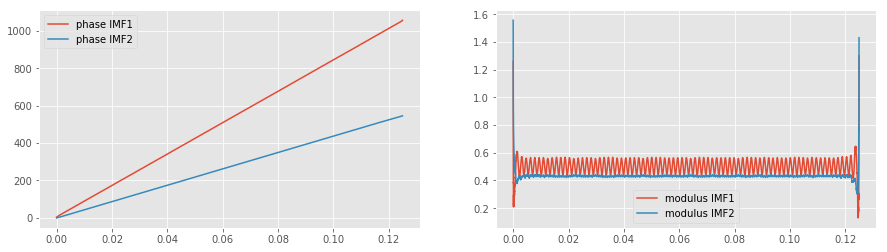

In [69]:
plt.figure(figsize=(15,4))

# plot phases
plt.subplot(121)
plt.plot(t, p1, label='phase IMF1')
plt.plot(t, p2, label='phase IMF2')
plt.legend();

# plot absolute values
plt.subplot(122)
plt.plot(t, a1, label='modulus IMF1')
plt.plot(t, a2, label='modulus IMF2')
plt.legend();

compute instantaneous phase frequency  $\omega(t)$ (discrete derivatives)

In [45]:
# derivative phase 1
if1 = np.zeros(p1.shape)
if1[:-1] = np.diff(p1) / np.diff(t)
if1[-1] = (p1[-1] - p1[-2]) / (t[-1] - t[-2])

# derivative phase 2
if2 = np.zeros(p2.shape)
if2[:-1] = np.diff(p2) / np.diff(t)
if2[-1] = (p2[-1] - p2[-2]) / (t[-1] - t[-2])

...and plot $\omega(t)$

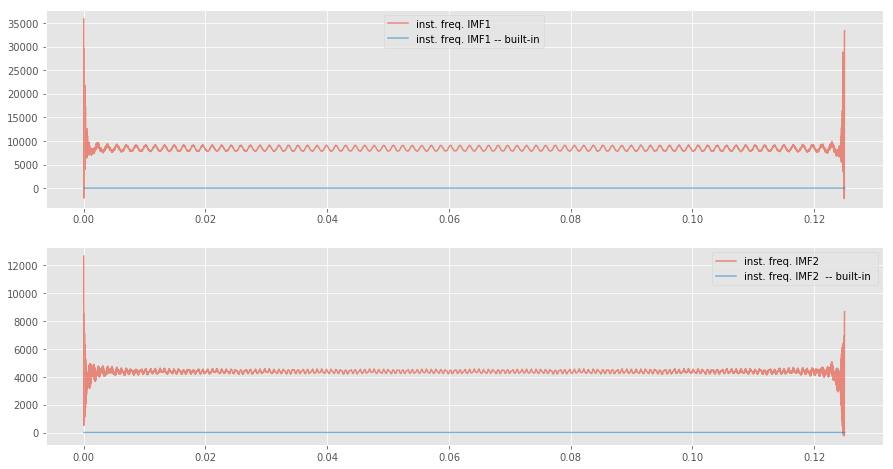

In [71]:
plt.figure(figsize=(15, 8))

plt.subplot(211)
plt.plot(t, if1, alpha=0.6, label='inst. freq. IMF1')

builtin_1 = hht.utils.inst_freq(h1)
plt.plot(builtin_1[1] * max(t)/max(builtin_1[1]),
         builtin_1[0],
         alpha=0.6,
         label='inst. freq. IMF1 -- built-in')

plt.legend()

plt.subplot(212)
plt.plot(t, if2, alpha=0.6, label='inst. freq. IMF2')

builtin_2 = hht.utils.inst_freq(h2)
plt.plot(builtin_2[1] * max(t)/max(builtin_2[1]),
         builtin_2[0],
         alpha=0.6,
         label='inst. freq. IMF2  -- built-in ')

plt.legend();

## build Hilbert spectrum

build the histogram of instantaneous frequency

In [ ]:
# set N. of bins
K = 128 

if1_hist, if1_edges = np.histogram(if1, bins=K)
if2_hist, if2_edges = np.histogram(if2, bins=K)

build arrays to store information about absolute value of the spectrum

In [55]:
# define empty boolean (0/1) arrays to store ...
w1 = np.zeros((K, if1.shape[0]))
w2 = np.zeros((K, if2.shape[0]))

# ... presence of freq. in each range - given the histogram
for i in range(K):
    start, stop = if1_edges[i], if1_edges[i + 1]
    w1[i, np.logical_and(if1 >= start, if1 <= stop)] = 1
    start, stop = if2_edges[i], if2_edges[i + 1]
    w2[i, np.logical_and(if2 >= start, if2 <= stop)] = 1

# multiple boolean arrays with absolut values of spectrum
TFR1 = a1 * w1
TFR2 = a2 * w2

show ???

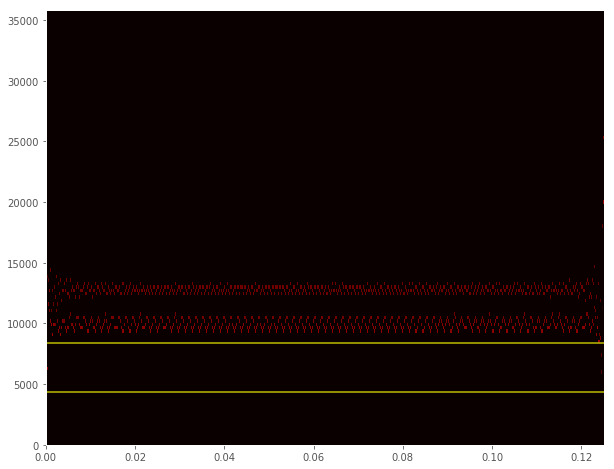

In [104]:
plt.figure(figsize=(10, 8))

# decent color maps: autumn_r, hot, 
plt.imshow(TFR1 + TFR2, interpolation="nearest", aspect="auto",
           cmap=plt.cm.hot, origin="bottomleft",
           extent=[t[0], t[-1], 0, if1_edges.max()])


plt.hlines([2 * np.pi * f1, 2 * np.pi * f2], 0, t[-1],color='y')
plt.grid(False)

# Example 2

## make synthetic dataset

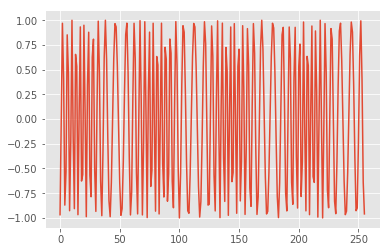

In [109]:
### BETTER DOC ON FTFB INSTALLATION IS NEEED ... --  needed to copy paste the tftb folder after cloning

from tftb.generators import fmsin
sig, iflaw = fmsin(256, 0.1, 0.3, period=64)
plt.plot(np.real(sig));

HHT on signal

In [110]:
xsig = np.real(sig)

emd = hht.EMD(xsig)

imfs = emd.decompose()

imfs.shape

(6, 256)

visualize the signal

2
3
4
5
6


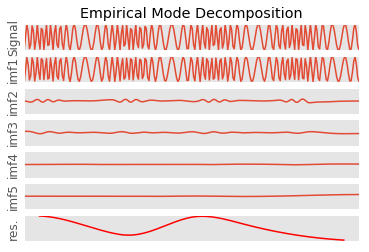

In [113]:
hht.visualization.plot_imfs(xsig, imfs)

## build Hilbert spectrum

compute spectrum (`TFR` variable)...

In [114]:
# B = 5 ## this varaible is not being used

K = 32
TFR = np.zeros((K, xsig.shape[0]))
t = np.arange(xsig.shape[0])

# exclude residues from the loop computing the spectrum
for imf in imfs[:-1, :]:
    
    h1 = sp.signal.hilbert(imf)
    phase = sp.angle(h1)
    a1 = np.abs(h1)
    p1 = sp.unwrap(phase)
    if1 = np.zeros(p1.shape)
    if1[:-1] = np.diff(p1) / np.diff(t)
    if1[-1] = (p1[-1] - p1[-2]) / (t[-1] - t[-2])
    if1_hist, if1_edges = np.histogram(if1, bins=K)
    w1 = np.zeros(TFR.shape)
    
    for i in range(K):
        
        start, stop = if1_edges[i], if1_edges[i + 1]
        w1[i, np.logical_and(if1 >= start, if1 <= stop)] = 1
    TFR += a1 * w1

...and plot it

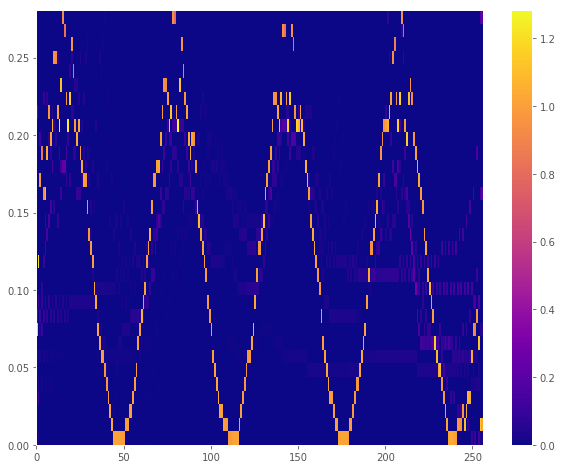

In [115]:
plt.figure(figsize=(10, 8))
plt.imshow(TFR, interpolation="nearest", aspect="auto", 
           cmap=plt.cm.plasma, origin="bottomleft",
           extent=[0, xsig.shape[0], 0, if1_edges.max()])
plt.grid(False)
plt.colorbar();